In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

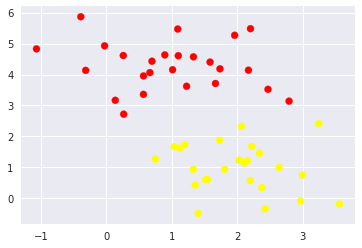

In [2]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

## Maximal margin classifier

In [9]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1E10)
clf.fit(X, y)
clf2 = SVC(kernel='linear', C=0.1)
clf2.fit(X, y)
clf3 = SVC()
clf3.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    # source: Python Data Science Handbook by Jake VanderPlas
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

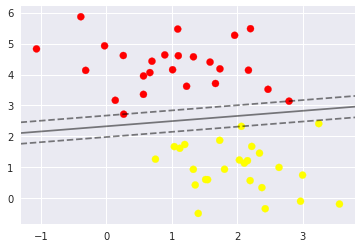

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf);

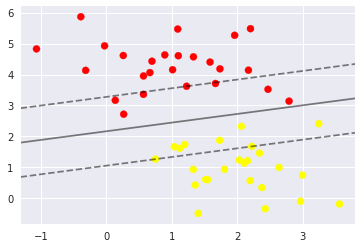

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf2);

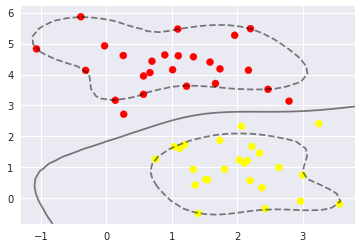

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf3);

* Only the position of the support vectors matter
* Any points further from the margin which are on the **correct side** do not modify the fit!

The hardness of the margin is controlled by a tuning parameter, C.
* For very large C (maximal margin classifier): the margin is hard, and points cannot lie in it.
* For smaller C (soft margin classifer): the margin is softer, and can grow to encompass some points.

How to choose C?  
*cross-validation*